Processing image: 1.jpg
Running K-Means clustering with K=3


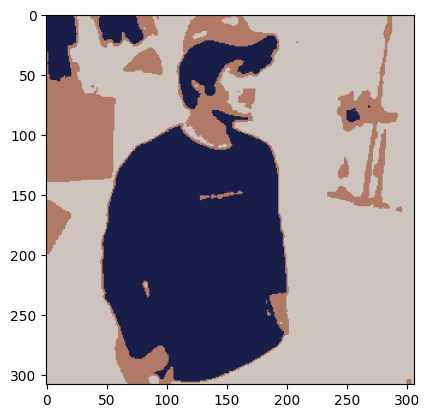

Running K-Means clustering with K=10


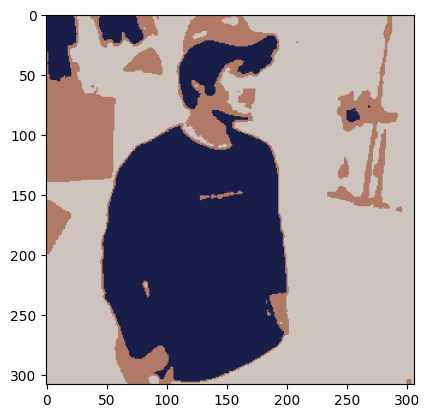

Running K-Means clustering with K=20


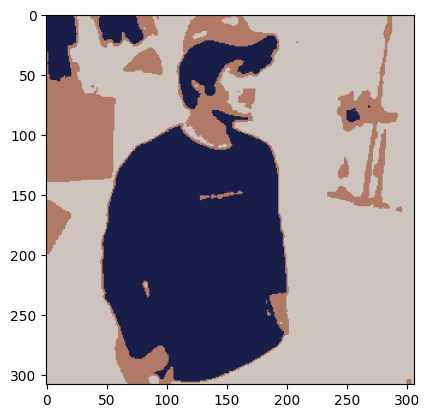

Processing image: 2.jpeg
Running K-Means clustering with K=3


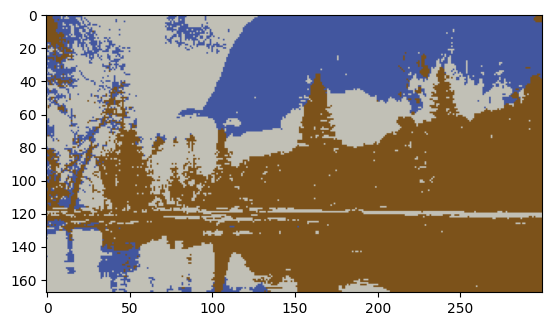

Running K-Means clustering with K=10


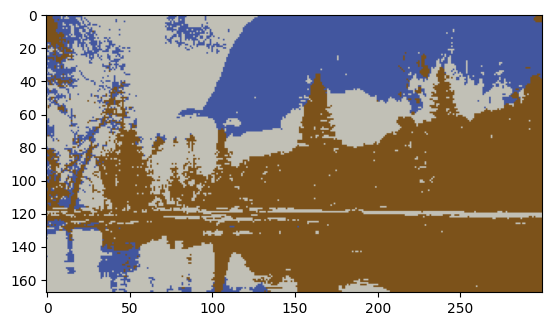

Running K-Means clustering with K=20


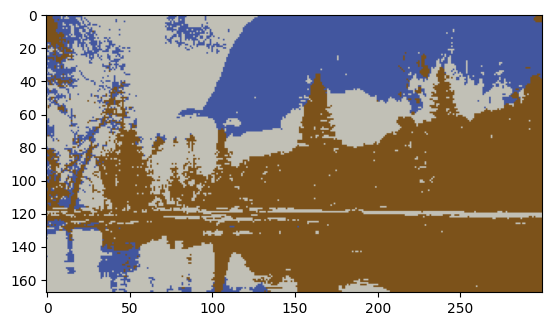

Processing image: 3.jpeg
Running K-Means clustering with K=3


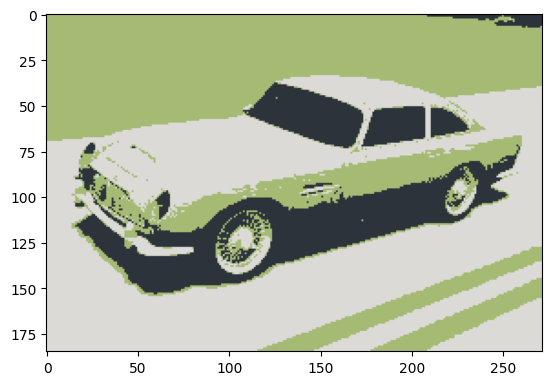

Running K-Means clustering with K=10


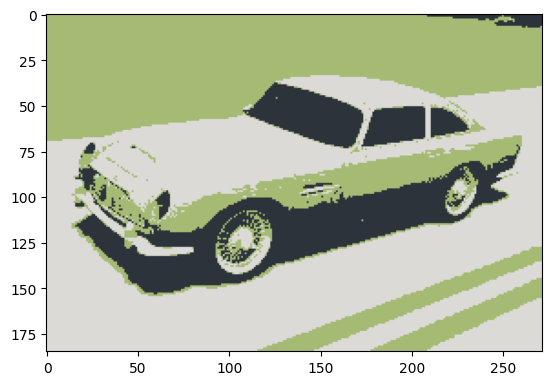

Running K-Means clustering with K=20


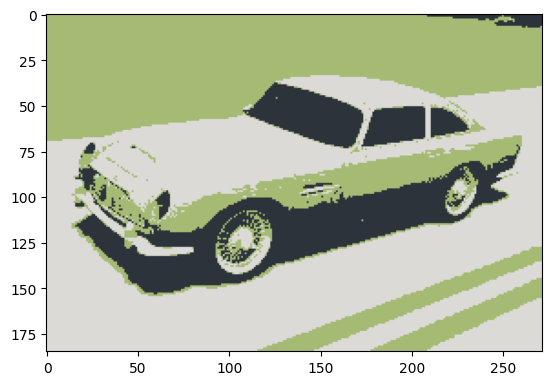

In [3]:
import numpy as np
import matplotlib.pyplot as plt  
from matplotlib.image import imread

class ImageClusterer:
    def fit(self, img_path):
        # Read the image from the specified path
        self.image = imread(img_path)
        # Get the dimensions of the image
        self.height, self.width, self.channels = self.image.shape
        # Reshape the image into a 2D array
        self.data = self.image.reshape(-1, self.channels)

    def cluster(self, num_clusters, iterations=100):
        # Initialize centroids randomly from the image data
        centroids = self.data[np.random.choice(self.data.shape[0], num_clusters, replace=False)]
        # Iterate to update centroids and labels
        for _ in range(iterations):
            # Calculate distances between points and centroids
            distances = np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2)
            # Assign each point to the nearest centroid
            labels = np.argmin(distances, axis=1)
            # Update centroids based on assigned points
            new_centroids = np.array([self.data[labels == k].mean(axis=0) if np.any(labels == k) else centroids[k] for k in range(num_clusters)])
            # Check for convergence
            if np.allclose(centroids, new_centroids):
                break
            centroids = new_centroids
        # Assign points to the final centroids
        self.data = new_centroids[labels]

    def display_clustered_image(self):
        # Reshape the clustered points into the original image shape
        clustered_image = self.data.reshape(self.height, self.width, self.channels).astype(np.uint8)
        # Display the clustered image
        plt.imshow(clustered_image)

def main():
    # List of paths to different types of images
    image_paths = ['1.jpg', '2.jpeg', '3.jpeg']
    
    # Iterate over each image
    for img_path in image_paths:
        print(f"Processing image: {img_path}")
        # Create ImageClusterer object
        clusterer = ImageClusterer()
        # Fit the model to the image data
        clusterer.fit(img_path)
        
        # Test K-Means clustering with different K values
        for k in [3, 10, 20]:
            print(f"Running K-Means clustering with K={k}")
            # Perform clustering
            clusterer.cluster(k)
            # Display the clustered image
            clusterer.display_clustered_image()
            # Add some delay to see each result 
            plt.pause(1)
    
    plt.show()

main()
